# Prelude

In [2]:
import numpy
import os
import matplotlib
import seaborn

import pandas

from matplotlib import pyplot

In [3]:
seaborn.set()

# Task 1

In [109]:
data = pandas.read_csv('long_task1_data.csv')

In [110]:
data.head()

,epochs,steps_0,steps_1,steps_2,steps_3,diff_0,diff_1,diff_2,diff_3,qmean_0,qmean_1,qmean_2,qmean_3
0,1,NaN,NaN,NaN,NaN,0.019662,0.019662,0.006904,0.016334,0.481869,0.481869,0.473702,0.478884
1,2,NaN,NaN,NaN,NaN,0.010484,0.007330,0.006424,0.015092,0.486709,0.484914,0.473659,0.482497
2,3,NaN,NaN,NaN,NaN,0.007066,0.004153,0.003650,0.006140,0.488223,0.483255,0.473753,0.479847
3,4,NaN,NaN,NaN,NaN,0.108841,0.007891,0.003939,0.007893,0.590051,0.481782,0.474365,0.481708
4,5,NaN,NaN,NaN,NaN,0.004074,0.006790,0.003840,0.005686,0.588245,0.479883,0.474975,0.479565


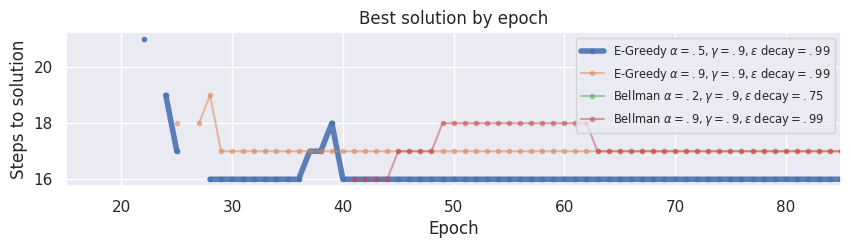

In [121]:
pyplot.rcParams['figure.figsize'] = 10, 2
pyplot.plot(data.steps_0, linewidth = 4, alpha = .9, marker = '.', label = r'E-Greedy $\alpha = .5, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.steps_1, alpha = .5, marker = '.', label = r'E-Greedy $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.steps_2, alpha = .5, marker = '.', label = r'Bellman $\alpha = .2, \gamma = .9, \varepsilon\;\text{decay} = .75$')
pyplot.plot(data.steps_3, alpha = .5, marker = '.', label = r'Bellman $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')

pyplot.xlim(15, 85)

# pyplot.gca().axhline(16, linestyle = '--', linewidth = 1, color = 'black', alpha = .5, label = 'Best possible score = 16')

pyplot.title('Best solution by epoch')
pyplot.xlabel('Epoch')
pyplot.ylabel('Steps to solution')
pyplot.legend(fontsize = 'x-small', loc = 0)

pyplot.savefig('task1_best_solution_by_epoch.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

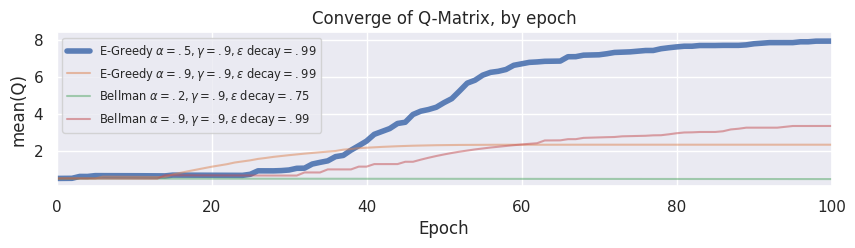

In [123]:
pyplot.rcParams['figure.figsize'] = 10, 2
pyplot.plot(data.qmean_0, linewidth = 4, alpha = .9, label = r'E-Greedy $\alpha = .5, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.qmean_1, alpha = .5, label = r'E-Greedy $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')
pyplot.plot(data.qmean_2, alpha = .5, label = r'Bellman $\alpha = .2, \gamma = .9, \varepsilon\;\text{decay} = .75$')
pyplot.plot(data.qmean_3, alpha = .5, label = r'Bellman $\alpha = .9, \gamma = .9, \varepsilon\;\text{decay} = .99$')

pyplot.xlim(0, 100)
# pyplot.ylim(0, .75)

pyplot.title('Converge of Q-Matrix, by epoch')
pyplot.xlabel('Epoch')
pyplot.ylabel('mean(Q)')
pyplot.legend(fontsize = 'x-small')

# pyplot.gca().yaxis.tick_right()

pyplot.savefig('task1_qmatrix_convergence.png', bbox_inches = 'tight', pad_inches = 0, dpi = 300)

# Task 2

In [4]:
params = pandas.read_csv('../Task 2/paramsearch.csv')

In [5]:
params

,Method,Eps Decay,Tau Decay,Batch Size,Action Size,Gamma,Update Freq,LR,Hidden Size,Q/Episode,Reward/Episode
0,DQN,50,0.5,1,32,0.5,10,0.0100,32,"[-6.36581563949585, -3.578998327255249, -3.387...","[-10033, -10022, 9992, -10017, -10023, -10030,..."
1,DQN,50,0.5,1,32,0.5,10,0.0100,128,"[-3.7556731700897217, -4.597557544708252, 3.64...","[-100, -10060, 10000, 9999, -10071, -10070, 99..."
2,DQN,50,0.5,1,32,0.5,10,0.0100,256,"[11.349201202392578, 42.3919792175293, -18.145...","[-100, -100, 9975, 9988, -100, -100, -100, -10..."
3,DQN,50,0.5,1,32,0.5,10,0.0001,32,"[-12.713902473449707, 8.021573066711426, -16.3...","[9968, 9902, -10053, -10094, -100, -10060, -10..."
4,DQN,50,0.5,1,32,0.5,10,0.0001,128,"[40.327003479003906, 45.49740219116211, 171.98...","[9975, 9995, -100, -100, 9997, -100, -10043, -..."
5,DQN,50,0.5,1,32,0.5,10,0.0001,256,"[33.1290168762207, 49.865196228027344, 189.330...","[-100, -100, -100, 9933, 9980, -10082, -100, -..."
6,DQN,50,0.5,1,32,0.5,50,0.0100,32,"[59.05058670043945, 200.38519287109375, 50.747...","[10000, -100, 10000, -100, -10025, -10073, -10..."
7,DQN,50,0.5,1,32,0.5,50,0.0100,128,"[80.4474105834961, 253.9060516357422, 363.7990...","[9984, 9985, -100, 9942, 9917, -100, 9968, -10..."
8,DQN,50,0.5,1,32,0.5,50,0.0100,256,"[53.13949203491211, 274.91680908203125, 117.00...","[9971, 9993, -10037, -100, -100, 9980, 9997, 9..."
9,DQN,50,0.5,1,32,0.5,50,0.0001,32,"[123.76289367675781, 212.19566345214844, 205.5...","[-100, 10000, -100, -100, -100, -100, -100, -1..."
